In [1]:
import requests
import shutil
import zipfile
import geopandas as gpd
import pandas as pd
from io import StringIO
import csv
from shapely import Point

### 1. NDAWM

In [54]:
url = 'https://ndawn.ndsu.nodak.edu/table.csv?ttype=hourly&station=84&begin_date=2024-09-21&end_date=2024-09-21'
r = requests.get(url)
data = list(csv.reader(StringIO(r.text), delimiter=','))
df = pd.DataFrame(data=data[5:], columns=data[3])
df['geometry'] = [Point(x,y) for x, y in zip(df.Longitude, df.Latitude)]
gdf = gpd.GeoDataFrame(df).set_crs(epsg=4326, inplace=True)
gdf['color'] = ['r']*len(gdf)
gdf

,Station Name,Latitude,Longitude,Elevation,Year,Month,Day,Hour,Avg Air Temp,Avg Air Temp Flag,...,Avg Wind Speed at 10 m,Avg Wind Speed at 10 m Flag,Max Wind Speed at 10 m,Max Wind Speed at 10 m Flag,Avg Wind Dir at 10 m,Avg Wind Dir at 10 m Flag,Avg Wind Dir SD at 10 m,Avg Wind Dir SD at 10 m Flag,geometry,color
0,Brampton,45.98412,-97.82077,1319,2024,09,21,100,52.160,,...,,,,,,,,,POINT (-97.82077 45.98412),r
1,Brampton,45.98412,-97.82077,1319,2024,09,21,200,54.788,,...,,,,,,,,,POINT (-97.82077 45.98412),r
2,Brampton,45.98412,-97.82077,1319,2024,09,21,300,58.136,,...,,,,,,,,,POINT (-97.82077 45.98412),r
3,Brampton,45.98412,-97.82077,1319,2024,09,21,400,58.064,,...,,,,,,,,,POINT (-97.82077 45.98412),r
4,Brampton,45.98412,-97.82077,1319,2024,09,21,500,54.554,,...,,,,,,,,,POINT (-97.82077 45.98412),r
5,Brampton,45.98412,-97.82077,1319,2024,09,21,600,53.510,,...,,,,,,,,,POINT (-97.82077 45.98412),r
6,Brampton,45.98412,-97.82077,1319,2024,09,21,700,51.386,,...,,,,,,,,,POINT (-97.82077 45.98412),r
7,Brampton,45.98412,-97.82077,1319,2024,09,21,800,58.856,,...,,,,,,,,,POINT (-97.82077 45.98412),r
8,Brampton,45.98412,-97.82077,1319,2024,09,21,900,61.448,,...,,,,,,,,,POINT (-97.82077 45.98412),r
9,Brampton,45.98412,-97.82077,1319,2024,09,21,1000,61.952,,...,,,,,,,,,POINT (-97.82077 45.98412),r


### 2. Minnesota Geospatial Commons

In [55]:
url = 'https://resources.gisdata.mn.gov/pub/gdrs/data/pub/us_mn_co_dakota/loc_parkrec_parkentrances/shp_loc_parkrec_parkentrances.zip'
r = requests.get(url)

with open('archive.zip', 'wb') as f:
  f.write(r.content)

with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
        zip_ref.extractall('mngc')
gdf_2 = gpd.read_file('./mngc/PARKREC_ParkEntrances.shp').set_crs(epsg=4326, inplace=True)
gdf_2['color'] = ['b']*len(gdf_2)
gdf_2

,PARKNAME,latitude,longitude,EMERGENCYT,ENTRANCETY,geometry,color
0,Lake Byllesby Regional Park,44.521720,-92.939251,Driveway to parking lot,Public,POINT (-92.93925 44.52172),b
1,Spring Lake Park Reserve - Schaar's Bluff,44.763872,-92.931727,Driveway to parking lot,Public,POINT (-92.93173 44.76387),b
2,Spring Lake Park Reserve - Model Airfield,44.763479,-92.924059,Driveway to parking lot,Public,POINT (-92.92406 44.76348),b
3,Thompson County Park,44.912354,-93.070419,Driveway to parking lot,Public,POINT (-93.07042 44.91235),b
4,Miesville Ravine Park Reserve,44.543699,-92.803360,Driveway to parking lot,Public,POINT (-92.80336 44.5437),b
5,Lebanon Hills Regional Park - Holland Lake,44.790118,-93.147778,Driveway to parking lot,Public,POINT (-93.14778 44.79012),b
6,Lebanon Hills Regional Park - Visitors Center,44.790158,-93.124153,Driveway to parking lot,Public,POINT (-93.12415 44.79016),b
7,Lebanon Hills Regional Park - Equestrian,44.775703,-93.126757,Driveway to parking lot,Public,POINT (-93.12676 44.7757),b
8,Lebanon Hills Regional Park - Jensen Lake,44.779266,-93.166675,Driveway to parking lot,Public,POINT (-93.16668 44.77927),b
9,Big Rivers Regional Trail - South End Parking,44.866599,-93.172933,Driveway to parking lot,Public,POINT (-93.17293 44.8666),b


### 3. ArcGIS Online REST API

In [56]:
url = 'https://utility.arcgis.com/usrsvcs/servers/8f5cd537aa944f8894dd7791f7802444/rest/services/Hosted/SouthDakota_CityLocations/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson'
r = requests.get(url)
gdf_3 = gpd.GeoDataFrame(pd.json_normalize(r.json())['features'][0])
gdf_3['geometry'] = [Point(x['coordinates']) for x in gdf_3['geometry']]
gdf_3 = gdf_3.set_geometry("geometry")
gdf_3.set_crs(epsg=4326, inplace=True)
gdf_3['color'] = ['g']*len(gdf_3)
gdf_3

,geometry,id,type,properties,color
0,POINT (-98.47423 45.46801),1,Feature,"{'x_coord': -98.47422, 'cnty_upcas': 'BROWN', ...",g
1,POINT (-99.08312 43.45646),2,Feature,"{'x_coord': -99.08311, 'cnty_upcas': 'CHARLES ...",g
2,POINT (-100.07288 44.83921),3,Feature,"{'x_coord': -100.07287, 'cnty_upcas': 'SULLY',...",g
3,POINT (-97.0591 44.3042),4,Feature,"{'x_coord': -97.05909142, 'cnty_upcas': 'BROOK...",g
4,POINT (-103.18104 43.89747),5,Feature,"{'x_coord': -103.18102999, 'cnty_upcas': 'PENN...",g
...,...,...,...,...,...
806,POINT (-97.98773 44.43341),807,Feature,"{'x_coord': -97.98772, 'cnty_upcas': 'BEADLE',...",g
807,POINT (-97.39679 42.87865),808,Feature,"{'x_coord': -97.39678301, 'cnty_upcas': 'YANKT...",g
808,POINT (-100.79699 45.28036),809,Feature,"{'x_coord': -100.79698, 'cnty_upcas': 'DEWEY',...",g
809,POINT (-98.72967 44.89754),810,Feature,"{'x_coord': -98.72965907, 'cnty_upcas': 'FAULK...",g


### Spatial join

<Axes: >

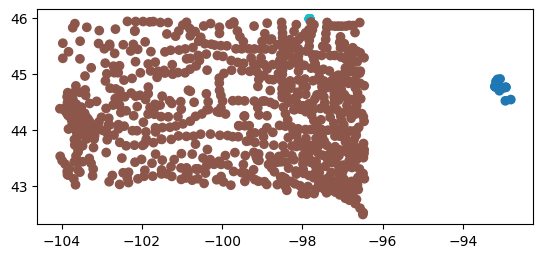

In [59]:
gdf_12 = pd.concat([gdf, gdf_2])
gdf_123 = pd.concat([gdf_12, gdf_3])
gdf_123.plot(column='color')

In [65]:
gdf_123.to_file(filename='./spatially_joined.gdb', layer='api_derived', driver='OpenFileGDB')#OpenFileGDB

/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'Station Name' to 'Station_Name'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'Avg Air Temp' to 'Avg_Air_Temp'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'Avg Air Temp Flag' to 'Avg_Air_Temp_Flag'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'Avg Rel Hum' to 'Avg_Rel_Hum'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'Avg Rel Hum Flag' to 'Avg_Rel_Hum_Flag'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'Avg Bare Soil Temp' to 'Avg_Bare_Soil_Temp'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/py

In [67]:
import zipfile
from os import listdir

with zipfile.ZipFile('gdb.zip', 'w') as zipf:  # 'w' for write mode
    for file in listdir('/content/spatially_joined.gdb'):
        zipf.write('/content/spatially_joined.gdb/'+file)